Aufgabe 1 a) Audioaufnahme

Aufnahme startet...
Aufnahme beendet.


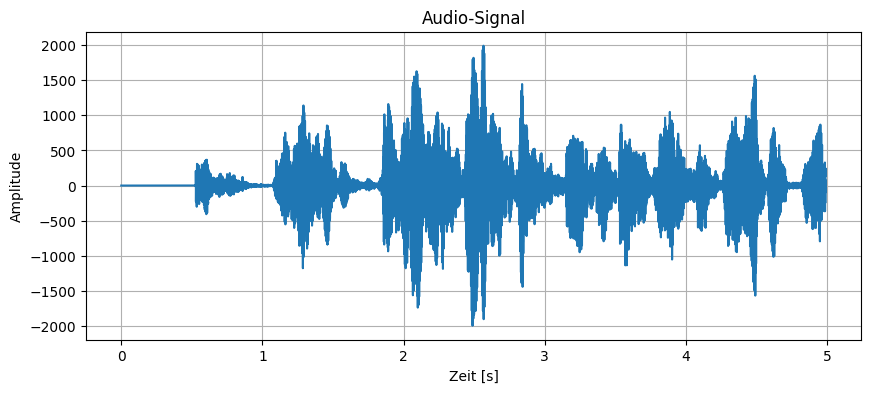

In [1]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Parameter für die Aufnahme
FORMAT = pyaudio.paInt16  # 16-bit Auflösung
CHANNELS = 1              # Monokanal
RATE = 44100              # Abtastrate (Samples pro Sekunde)
CHUNK = 1024              # Anzahl der Frames pro Buffer
RECORD_SECONDS = 5        # Dauer der Aufnahme (in Sekunden)

# Eindeutiger Dateiname basierend auf Zeitstempel
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
npy_filename = f"rechts_{timestamp}.npy"

# PyAudio initialisieren
audio = pyaudio.PyAudio()

# Aufnahme starten
print("Aufnahme startet...")
stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Aufnahme beendet.")

# Aufnahme stoppen und Ressourcen freigeben
stream.stop_stream()
stream.close()
audio.terminate()

# Konvertierung zu NumPy-Array
audio_data = np.frombuffer(b''.join(frames), dtype=np.int16)

# NumPy-Array speichern
#np.save(npy_filename, audio_data)
#print(f"NumPy-Datei gespeichert als {npy_filename}")

# Plot des Signals
time = np.linspace(0, len(audio_data) / RATE, num=len(audio_data))
plt.figure(figsize=(10, 4))
plt.plot(time, audio_data)
plt.title("Audio-Signal")
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Aufgabe 1 b) Generalisierung der Aufnahme

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Liste mit den 4 verschiedenen Paths für die Referenzdaten
dir_paths = []
dir_paths.append("./Data/Referenz/Links/")
dir_paths.append("./Data/Referenz/Rechts/")
dir_paths.append("./Data/Referenz/Hoch/")
dir_paths.append("./Data/Referenz/Tief/")
dir_paths.append("./Data/Beispiel1/Links/")
dir_paths.append("./Data/Beispiel1/Rechts/")
dir_paths.append("./Data/Beispiel1/Hoch/")
dir_paths.append("./Data/Beispiel1/Tief/")
dir_paths.append("./Data/Beispiel2/Links/")
dir_paths.append("./Data/Beispiel2/Rechts/")
dir_paths.append("./Data/Beispiel2/Hoch/")
dir_paths.append("./Data/Beispiel2/Tief/")
dir_paths.append("./Data/")

# Einlesen der Referenzdaten in eine 2D-Liste ([Richtung][Datei])
ref_data = []
for i in range(len(dir_paths)):
    ref_data.append([])
    for filename in os.listdir(dir_paths[i]):
        if filename.endswith(".npy"):
            ref_data[i].append(np.load(dir_paths[i] + filename))

# Generalisieren der Daten (alle beginnend ab dem 1. Triggerpunkt und haben die Länge 1s)

def find_trigger_point(data, start_index=40000, threshold=50):
    for i in range(start_index, len(data)):
        if data[i] >= threshold or data[i] <= -threshold:
            return i
    return start_index

def generalise_signal_data(ref_data, dir_paths, threshold=50, start_index=40000):
    ref_data_general = [[None for _ in data] for data in ref_data]  # Initialisierung
    
    for i, data in enumerate(ref_data):
        for j, d in enumerate(data):
            # Triggerpunkt finden (ab start_index)
            start = find_trigger_point(d, start_index, threshold)
            segment_length = 44100 # 1 Sekunde
            
            # Segment extrahieren und ggf. auffüllen
            segment = d[start:start + segment_length]
            if len(segment) < segment_length:
                segment = np.pad(segment, (0, segment_length - len(segment)), 'constant')
            
            # Segment speichern
            ref_data_general[i][j] = segment
            save_path = f"{dir_paths[i]}general_{j}.npy"
            np.save(save_path, segment)
            print(f"Segment gespeichert: {save_path}")
    
    print("Generalisierung abgeschlossen.")
    return ref_data_general

ref_data_general = generalise_signal_data(ref_data, dir_paths)

Segment gespeichert: ./Data/Referenz/Links/general_0.npy
Segment gespeichert: ./Data/Referenz/Links/general_1.npy
Segment gespeichert: ./Data/Referenz/Links/general_2.npy
Segment gespeichert: ./Data/Referenz/Links/general_3.npy
Segment gespeichert: ./Data/Referenz/Links/general_4.npy
Segment gespeichert: ./Data/Referenz/Links/general_5.npy
Segment gespeichert: ./Data/Referenz/Rechts/general_0.npy
Segment gespeichert: ./Data/Referenz/Rechts/general_1.npy
Segment gespeichert: ./Data/Referenz/Rechts/general_2.npy
Segment gespeichert: ./Data/Referenz/Rechts/general_3.npy
Segment gespeichert: ./Data/Referenz/Rechts/general_4.npy
Segment gespeichert: ./Data/Referenz/Hoch/general_0.npy
Segment gespeichert: ./Data/Referenz/Hoch/general_1.npy
Segment gespeichert: ./Data/Referenz/Hoch/general_2.npy
Segment gespeichert: ./Data/Referenz/Hoch/general_3.npy
Segment gespeichert: ./Data/Referenz/Hoch/general_4.npy
Segment gespeichert: ./Data/Referenz/Tief/general_0.npy
Segment gespeichert: ./Data/Refe

Beispiel-Plot der Referenzdaten:


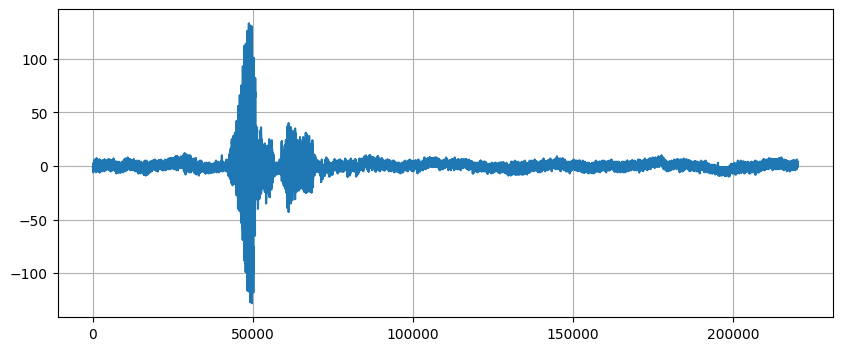

Beispiel-Plot der generalisierten Referenzdaten:


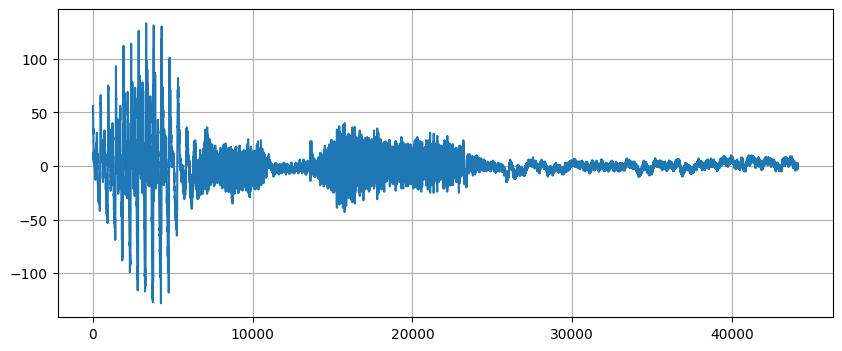

In [3]:
# Plot der ref_data und ref_data_general Referenzdaten
print("Beispiel-Plot der Referenzdaten:")
plt.figure(figsize=(10, 4))
plt.plot(ref_data[1][4])
plt.grid()
plt.show()

print("Beispiel-Plot der generalisierten Referenzdaten:")
plt.figure(figsize=(10, 4))
plt.plot(ref_data_general[1][4])
plt.grid()
plt.show()

Aufgabe 1 c) bestimme das Amplitudenspektrum des ausgeschnittenen "Hallo" Signals

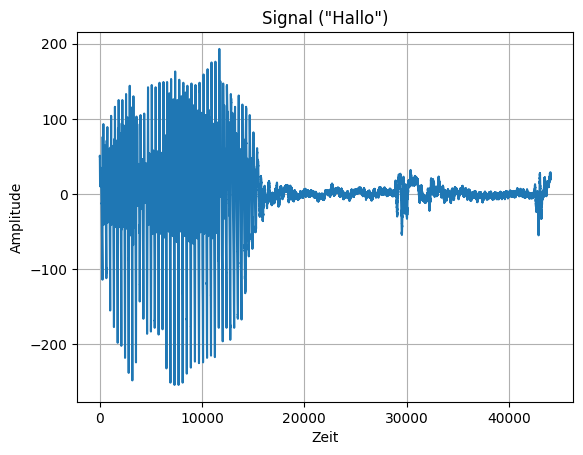

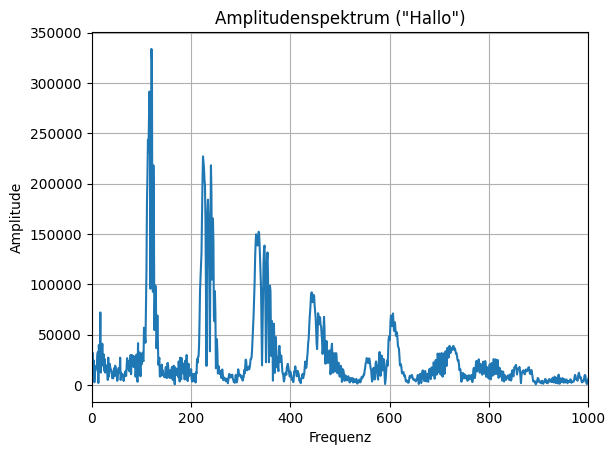

In [4]:
# Einlesen der hallo.npy Datei
data = ref_data_general[12][0]
freq = np.zeros(44100)

#data plotten
plt.plot(data)
plt.grid()
plt.title('Signal ("Hallo")')
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.show()


#data fouriertransformieren
spektrum = np.fft.fft(data[:44100])
# Negative Werte invertieren
spektrum = np.abs(spektrum)
# Formel um die Anzahl der Schwingungen in die Freuquenz umzurechnen: f = n / (M * t)
for x in range(len(freq)):
    freq[x] = (x / 1)# 44100 * 1/44100 = 1

# Darstellung des Amplitudenspektrums
plt.plot(freq, spektrum)
plt.grid()
plt.title('Amplitudenspektrum ("Hallo")')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.xlim(0, 1000)
plt.show()

Aufgabe 1 d) Implementierung von Windowing

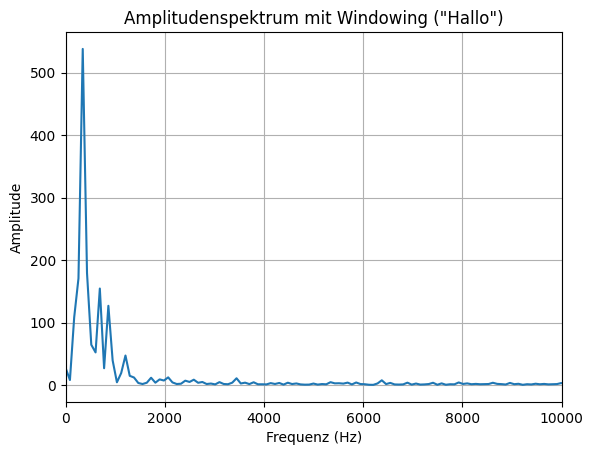

In [5]:
from scipy.signal import get_window

# Einlesen der .npy Datei
data = ref_data_general[12][0]

# Parameter
window_length = 512
overlap = window_length // 2
step = window_length - overlap
num_windows = (len(data) - overlap) // step

def windowing(data):    
    # Gaußsche Fensterfunktion
    std_dev = window_length / 4
    window = get_window(('gaussian', std_dev), window_length)
    
    # Fouriertransformation und Mittelung
    spectrum_sum = np.zeros(window_length, dtype=np.complex128)
    
    for i in range(num_windows):
        start = i * step
        end = start + window_length
        segment = data[start:end] * window
        spectrum = np.fft.fft(segment)
        spectrum_sum += spectrum
    
    # Mittelung
    spectrum_avg = spectrum_sum / num_windows
    ampl_spectrum = np.abs(spectrum_avg)
    return ampl_spectrum

amplitude_spectrum_w = windowing(data)

# Frequenzachse
freq = np.fft.fftfreq(window_length, d=1/44100)

# Darstellung des Amplitudenspektrums
plt.plot(freq[:window_length//2], amplitude_spectrum_w[:window_length//2])
plt.grid()
plt.title('Amplitudenspektrum mit Windowing ("Hallo")')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 10000)
plt.show()

Aufgabe 2 a) Referenzspektren für Spracherkennung

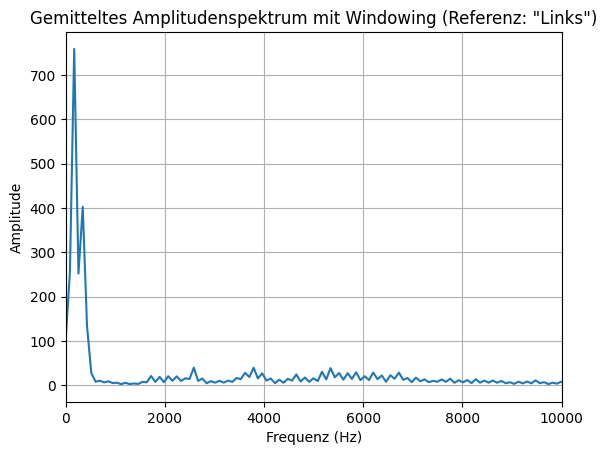

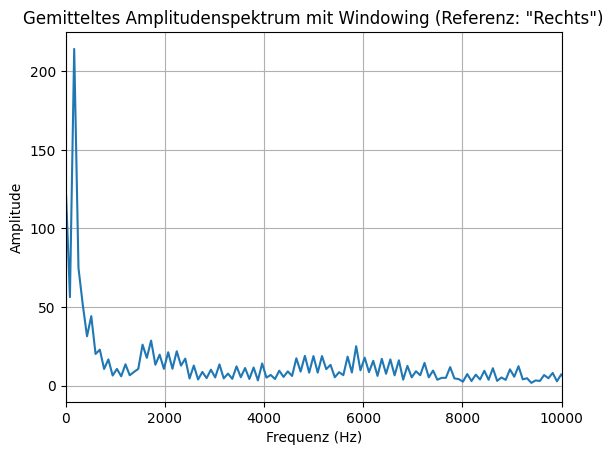

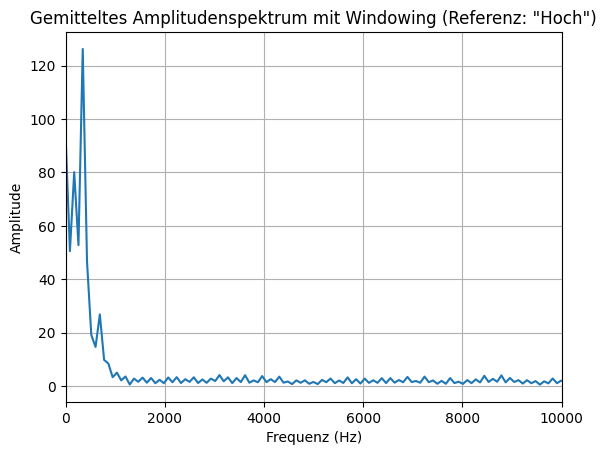

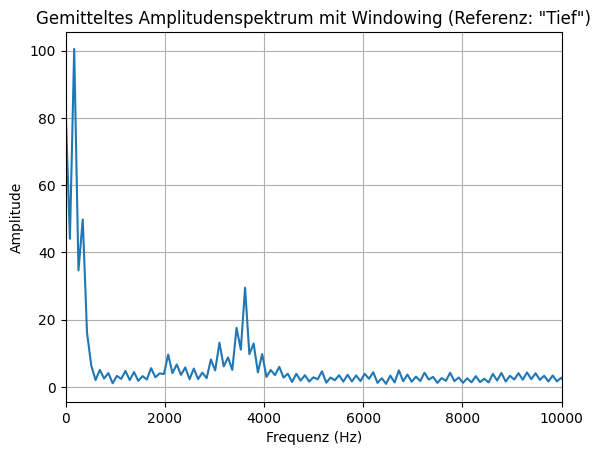

In [6]:
# Initialisiere das Summenspektrum
sum_spectrum = np.zeros(44100, dtype=np.complex128)
tmp = np.zeros(44100)

freq = np.zeros(44100)
for x in range(len(freq)):
    freq[x] = (x / 1)

# Initialisiere ein leeres Array für die average_spectrum
average_spectra_referenz = []
wort_array = ['Links', 'Rechts', 'Hoch', 'Tief']

# Schleife über die ersten 5 Listen in ref_data_general[8:12]
for i in range(0, 4):
    sum_spectrum = 0  # Initialisiere sum_spectrum vor der inneren Schleife
    for j in range(5):
        data = ref_data_general[i][j]
        amplitude_spectrum = windowing(data)
        sum_spectrum += amplitude_spectrum
    
    # Mittelung des Summenspektrums
    average_spectrum = sum_spectrum / 5
    
    # Speichere das average_spectrum im Array
    average_spectra_referenz.append(average_spectrum)
    
# Frequenzachse
freq = np.fft.fftfreq(window_length, d=1/44100)

# Darstellung des gemittelten Amplitudenspektrums
for k in range(len(average_spectra_referenz)):
    plt.plot(freq[:window_length//2], average_spectra_referenz[k][:window_length//2])
    plt.grid()
    plt.title(f'Gemitteltes Amplitudenspektrum mit Windowing (Referenz: "{wort_array[k]}")')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 10000)
    plt.show()

Aufgabe 2 b) Spracherkennung mit Beispielsatz 1 (selber Sprecher)

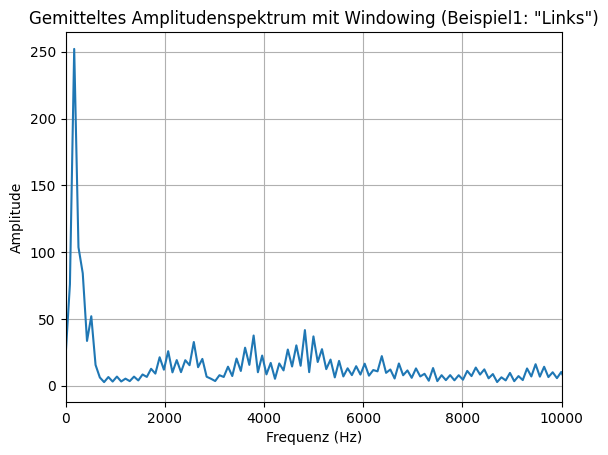

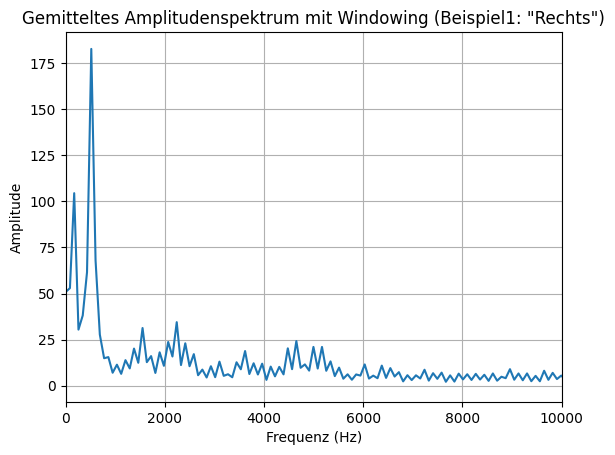

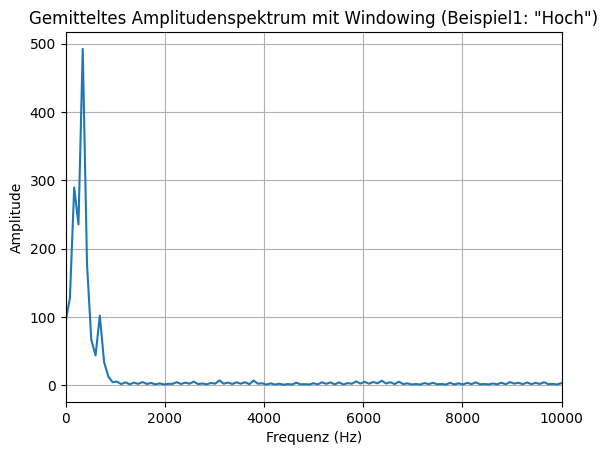

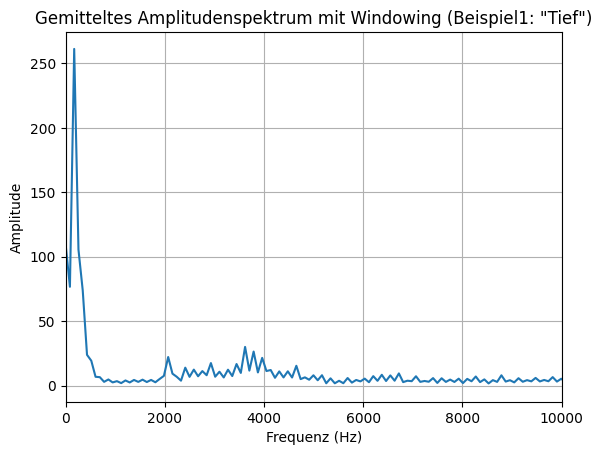

In [7]:
# Berechnen der Spektren für den Beispielsatz 1

# Initialisiere ein leeres Array für die average_spectrum
average_spectra_beispiel1 = []

# Schleife über die ersten 5 Listen in ref_data_general[8:12]
for i in range(4, 8):
    sum_spectrum = 0  # Initialisiere sum_spectrum vor der inneren Schleife
    for j in range(5):
        data = ref_data_general[i][j]
        amplitude_spectrum = windowing(data)
        sum_spectrum += amplitude_spectrum
    
    # Mittelung des Summenspektrums
    average_spectrum = sum_spectrum / 5
    
    # Speichere das average_spectrum im Array
    average_spectra_beispiel1.append(average_spectrum)
    
# Frequenzachse
freq = np.fft.fftfreq(window_length, d=1/44100)

# Darstellung des gemittelten Amplitudenspektrums
for k in range(len(average_spectra_beispiel1)):
    plt.plot(freq[:window_length//2], average_spectra_beispiel1[k][:window_length//2])
    plt.grid()
    plt.title(f'Gemitteltes Amplitudenspektrum mit Windowing (Beispiel1: "{wort_array[k]}")')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 10000)
    plt.show()


In [8]:
#Korrelationskoefizienten berechnen
#covariance(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
#Pearson = covariance(X, Y) / (stdv(X) * stdv(Y))

#corr_coefficients = []
#for i in range(4):
#    corr_coefficients.append(np.corrcoef(average_spectra_referenz[i], average_spectra_beispiel1[i])[0, 1])

def calculate_pearson_correlation(x, y):
    # Mittelwerte berechnen
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Differenzen zu den Mittelwerten berechnen
    diff_x = x - mean_x
    diff_y = y - mean_y
    
    # Paarweise Produkte der Differenzen berechnen und summieren
    covariance = np.sum(diff_x * diff_y)
    
    # Standardabweichungen berechnen
    std_x = np.std(x, ddof=1)
    std_y = np.std(y, ddof=1)
    
    # Pearson-Korrelation berechnen
    pearson_correlation = covariance / ((len(x) - 1) * std_x * std_y)
    
    return pearson_correlation

# Beispielhafte Verwendung mit average_spectra_referenz und average_spectra_beispiel1
corr_coefficients = []
for i in range(4):
    corr_coefficients.append(calculate_pearson_correlation(average_spectra_referenz[i], average_spectra_beispiel1[i]))

# Ausgabe der Korrelationskoeffizienten
print("Korrelationskoefizienten:")
for i in range(4):
    print(f"{wort_array[i]}: {corr_coefficients[i]}")
    

Korrelationskoefizienten:
Links: 0.9371204007650504
Rechts: 0.6793085238095528
Hoch: 0.9576841975191447
Tief: 0.9493303777537736


Aufgabe 2 c) Spracherkennung mit Beispielsatz 2 (anderer Sprecher)

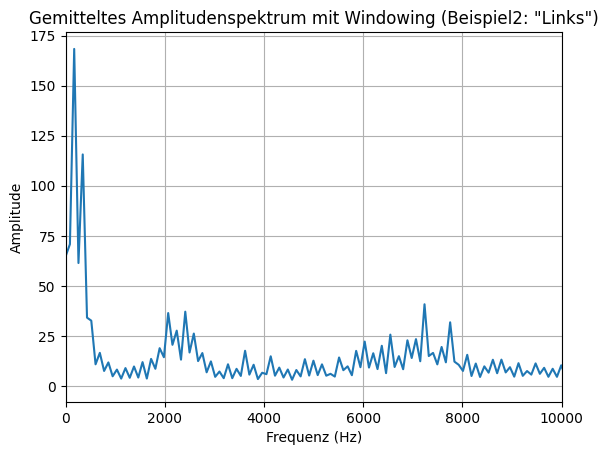

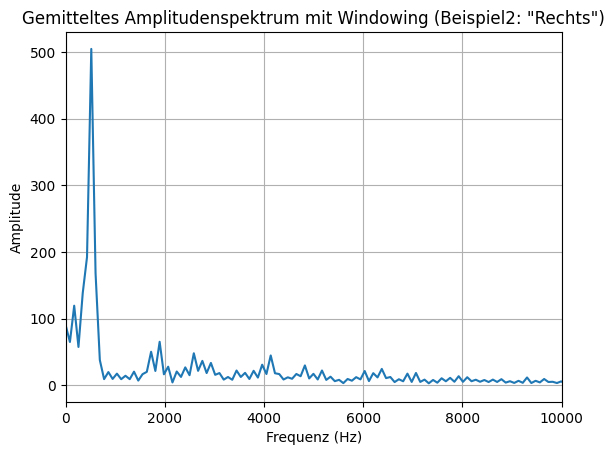

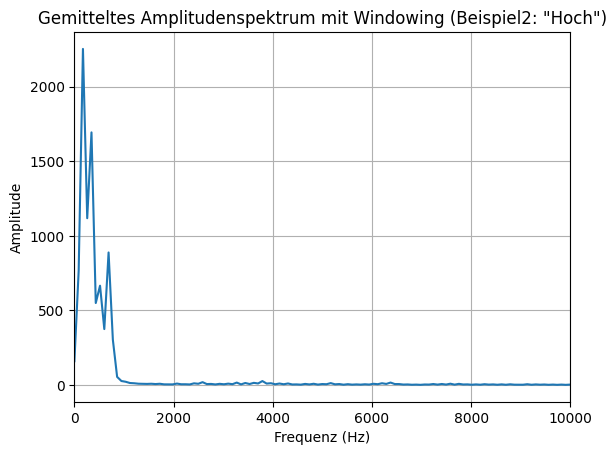

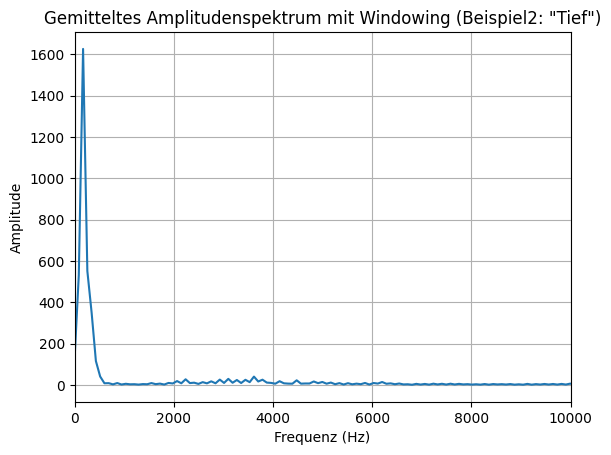

In [9]:
# Berechnen der Spektren für den Beispielsatz 2

# Initialisiere ein leeres Array für die average_spectrum
average_spectra_beispiel2 = []

# Schleife über die ersten 5 Listen in ref_data_general[8:12]
for i in range(8, 12):
    sum_spectrum = 0  # Initialisiere sum_spectrum vor der inneren Schleife
    for j in range(5):
        data = ref_data_general[i][j]
        amplitude_spectrum = windowing(data)
        sum_spectrum += amplitude_spectrum
    
    # Mittelung des Summenspektrums
    average_spectrum = sum_spectrum / 5
    
    # Speichere das average_spectrum im Array
    average_spectra_beispiel2.append(average_spectrum)
    
# Frequenzachse
freq = np.fft.fftfreq(window_length, d=1/44100)

# Darstellung des gemittelten Amplitudenspektrums
for k in range(len(average_spectra_beispiel2)):
    plt.plot(freq[:window_length//2], average_spectra_beispiel2[k][:window_length//2])
    plt.grid()
    plt.title(f'Gemitteltes Amplitudenspektrum mit Windowing (Beispiel2: "{wort_array[k]}")')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 10000)
    plt.show()

In [10]:
#Korrelationskoefizienten berechnen
# Beispielhafte Verwendung mit average_spectra_referenz und average_spectra_beispiel2
corr_coefficients = []
for i in range(4):
    corr_coefficients.append(calculate_pearson_correlation(average_spectra_referenz[i], average_spectra_beispiel2[i]))

# Ausgabe der Korrelationskoeffizienten
print("Korrelationskoefizienten:")
for i in range(4):
    print(f"{wort_array[i]}: {corr_coefficients[i]}")

Korrelationskoefizienten:
Links: 0.9141341224412898
Rechts: 0.4706517570061849
Hoch: 0.8801855056858632
Tief: 0.8677915829226929


Aufgabe 2 d) Auswertung und Implementierung der Spracherkennung

In [11]:
richtige = 0
word_corr = []
spectren_referenz = []
spectren_beispiel1 = []
spectren_beispiel2 = []

for i in range(4):
    spectren_referenz.append([])
    spectren_beispiel1.append([])
    spectren_beispiel2.append([])
    for j in range(5):
        data = ref_data_general[i][j]
        data1 = ref_data_general[i + 4][j]
        data2 = ref_data_general[i + 8][j]
        amplitude_spectrum = windowing(data)
        amplitude_spectrum1 = windowing(data1)
        amplitude_spectrum2 = windowing(data2)
        spectren_referenz[i].append(amplitude_spectrum)
        spectren_beispiel1[i].append(amplitude_spectrum1)
        spectren_beispiel2[i].append(amplitude_spectrum2)

import numpy as np

def speech_recognition(average_spectra_referenz, spectren_beispiel):
    richtige = 0
    for i in range(4):
        for j in range(5):
            word_corr = []
            for k in range(4):
                corr_coefficient = calculate_pearson_correlation(average_spectra_referenz[k], spectren_beispiel[i][j])
                word_corr.append(corr_coefficient)
            recognized_word_index = np.argmax(word_corr)
            print(f"{wort_array[i]} {j+1} erkannt als: {wort_array[recognized_word_index]}")
            if wort_array[i] == wort_array[recognized_word_index]:
                richtige += 1
    
    return richtige

# Example usage
richtige = speech_recognition(average_spectra_referenz, spectren_referenz)
print(f"Anzahl der richtigen Erkennungen (Referenz): {richtige}, Genauigkeit: {richtige / 20 * 100:.2f}%\n")

richtige = speech_recognition(average_spectra_referenz, spectren_beispiel1)
print(f"Anzahl der richtigen Erkennungen (Beispiel 1): {richtige}, Genauigkeit: {richtige / 20 * 100:.2f}%\n")

richtige = speech_recognition(average_spectra_referenz, spectren_beispiel2)
print(f"Anzahl der richtigen Erkennungen (Beispiel 2): {richtige}, Genauigkeit: {richtige / 20 * 100:.2f}%\n")



Links 1 erkannt als: Links
Links 2 erkannt als: Links
Links 3 erkannt als: Links
Links 4 erkannt als: Links
Links 5 erkannt als: Hoch
Rechts 1 erkannt als: Rechts
Rechts 2 erkannt als: Links
Rechts 3 erkannt als: Rechts
Rechts 4 erkannt als: Rechts
Rechts 5 erkannt als: Rechts
Hoch 1 erkannt als: Tief
Hoch 2 erkannt als: Links
Hoch 3 erkannt als: Rechts
Hoch 4 erkannt als: Hoch
Hoch 5 erkannt als: Hoch
Tief 1 erkannt als: Tief
Tief 2 erkannt als: Links
Tief 3 erkannt als: Tief
Tief 4 erkannt als: Tief
Tief 5 erkannt als: Tief
Anzahl der richtigen Erkennungen (Referenz): 14, Genauigkeit: 70.00%

Links 1 erkannt als: Links
Links 2 erkannt als: Rechts
Links 3 erkannt als: Rechts
Links 4 erkannt als: Links
Links 5 erkannt als: Links
Rechts 1 erkannt als: Rechts
Rechts 2 erkannt als: Rechts
Rechts 3 erkannt als: Rechts
Rechts 4 erkannt als: Rechts
Rechts 5 erkannt als: Rechts
Hoch 1 erkannt als: Hoch
Hoch 2 erkannt als: Hoch
Hoch 3 erkannt als: Hoch
Hoch 4 erkannt als: Hoch
Hoch 5 erkannt a